In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import os 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv
#D:/Users/Baki/Documents/GitHub/IP-stats-trends/venv/csv
bme = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/bme.csv",parse_dates=["Date"], index_col="Date")
vh1 = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/vh1.csv",parse_dates=["Date"], index_col="Date")
vh2 = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/vh2.csv",parse_dates=["Date"], index_col="Date")
sze = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/szeged.csv",parse_dates=["Date"], index_col="Date")
lin = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/linx.csv",parse_dates=["Date"], index_col="Date")
jin = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/jinx.csv",parse_dates=["Date"], index_col="Date")
eqi = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/eqix.csv",parse_dates=["Date"], index_col="Date")
syd = pd.read_csv("C:/Users/bakit/PycharmProjects/IP-stats-trends/venv/csv/sydney.csv",parse_dates=["Date"], index_col="Date")
bme['pref_msp_nor'] = bme['Msp_sum'] / bme['Total_count']
vh1['pref_msp_nor'] = vh1['Msp_sum'] / vh1['Total_count']
vh2['pref_msp_nor'] = vh2['Msp_sum'] / vh2['Total_count']
sze['pref_msp_nor'] = sze['Msp_sum'] / sze['Total_count']
lin['pref_msp_nor'] = lin['Msp_sum'] / lin['Total_count']
jin['pref_msp_nor'] = jin['Msp_sum'] / jin['Total_count']
eqi['pref_msp_nor'] = eqi['Msp_sum'] / eqi['Total_count']
syd['pref_msp_nor'] = syd['Msp_sum'] / syd['Total_count']

Index = list(set(list(bme.index) + list(vh1.index )+ list(vh2.index) + list(sze.index) +list(lin.index) + list(jin.index )+ list(eqi.index) + list(syd.index)))
Index.sort()

df4 = pd.DataFrame({'linx': [lin.loc[Date, 'pref_msp_nor'] if Date in lin.index else np.nan for Date in Index],
                    'jinx': [jin.loc[Date, 'pref_msp_nor'] if Date in jin.index else np.nan for Date in Index],
                    'eqix': [eqi.loc[Date, 'pref_msp_nor'] if Date in eqi.index else np.nan for Date in Index],
                    'sydney': [syd.loc[Date, 'pref_msp_nor'] if Date in syd.index else np.nan for Date in Index],
                    'bme': [bme.loc[Date, 'pref_msp_nor'] if Date in bme.index else np.nan for Date in Index],
                    'vh1': [vh1.loc[Date, 'pref_msp_nor'] if Date in vh1.index else np.nan for Date in Index],
                    'vh2': [vh2.loc[Date, 'pref_msp_nor'] if Date in vh2.index else np.nan for Date in Index],
                    'szeged': [sze.loc[Date, 'pref_msp_nor'] if Date in sze.index else np.nan for Date in Index],
                   },index = Index)
df4['index'] = df4.index
bme.head()

#fig = px.scatter(df4, x="linx", y="jinx", color="bme", trendline="lowess")
#fig.show()

,Total_count,Msp_sum,Pref_1,Pref_2,Pref_3,Pref_4,Pref_5,Pref_6,Pref_7,Pref_8,...,Msp_25,Msp_26,Msp_27,Msp_28,Msp_29,Msp_30,Msp_31,Msp_32,Per_8,pref_msp_nor
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-13,478068,45241,0,0,0,0,0,0,0,16,...,3,1,4,0,66,0,0,0,158.224656,0.094633
2013-11-20,478982,45387,0,0,0,0,0,0,0,16,...,3,1,4,0,51,0,0,0,158.468836,0.094757
2013-11-21,479190,45412,0,0,0,0,0,0,0,16,...,3,1,4,0,66,0,0,0,158.130087,0.094768
2013-11-22,478766,45406,0,0,0,0,0,0,0,16,...,3,1,4,0,65,0,0,0,158.163697,0.094840
2013-11-23,479081,45410,0,0,0,0,0,0,0,16,...,3,1,4,0,66,0,0,0,158.188681,0.094786


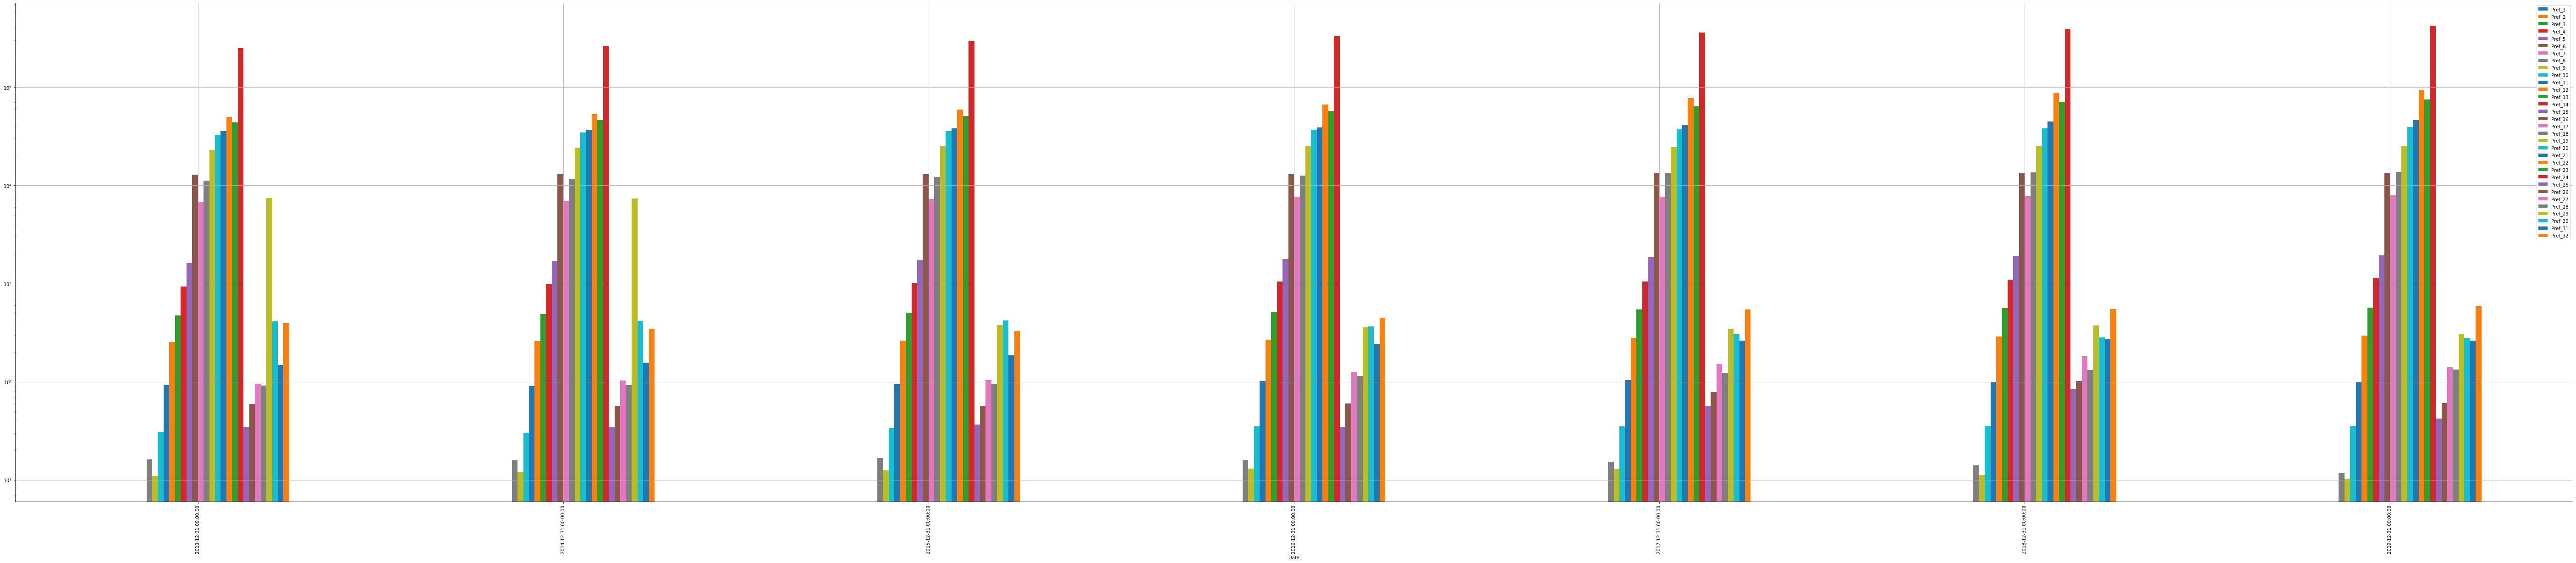

In [3]:
bme_pref =bme.copy()
for col in bme_pref.columns: 
    if "Pref" not in col:
        #print(col)        
        bme_pref.drop(columns=[col],inplace=True)   

plot=bme_pref.resample('Y').mean().plot(figsize=(100,20), kind='bar')
plot.set_yscale('log')
plot.grid()



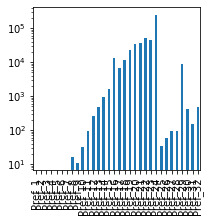

In [44]:
row = bme_pref.iloc[10]
plot= row.plot(figsize=(3,3),kind="bar")
plot.set_yscale("log")




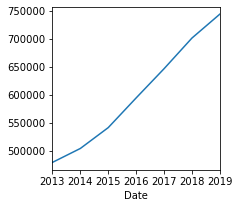

In [48]:
bme['Total_count'].resample('Y').mean().plot(figsize=(3,3))


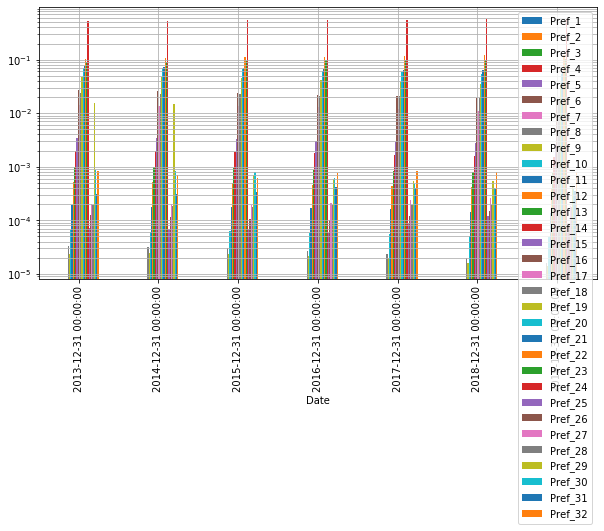

In [34]:
bme_pref_nor=bme_pref.copy()

bme_pref_nor["Pref_1"] = bme["Pref_1"]/bme["Total_count"]
bme_pref_nor["Pref_2"] = bme["Pref_2"]/bme["Total_count"]
bme_pref_nor["Pref_3"] = bme["Pref_3"]/bme["Total_count"]
bme_pref_nor["Pref_4"] = bme["Pref_4"]/bme["Total_count"]
bme_pref_nor["Pref_5"] = bme["Pref_5"]/bme["Total_count"]
bme_pref_nor["Pref_6"] = bme["Pref_6"]/bme["Total_count"]
bme_pref_nor["Pref_7"] = bme["Pref_7"]/bme["Total_count"]
bme_pref_nor["Pref_8"] = bme["Pref_8"]/bme["Total_count"]
bme_pref_nor["Pref_9"] = bme["Pref_9"]/bme["Total_count"]
bme_pref_nor["Pref_10"] = bme["Pref_10"]/bme["Total_count"]
bme_pref_nor["Pref_11"] = bme["Pref_11"]/bme["Total_count"]
bme_pref_nor["Pref_12"] = bme["Pref_12"]/bme["Total_count"]
bme_pref_nor["Pref_13"] = bme["Pref_13"]/bme["Total_count"]
bme_pref_nor["Pref_14"] = bme["Pref_14"]/bme["Total_count"]
bme_pref_nor["Pref_15"] = bme["Pref_15"]/bme["Total_count"]
bme_pref_nor["Pref_16"] = bme["Pref_16"]/bme["Total_count"]
bme_pref_nor["Pref_17"] = bme["Pref_17"]/bme["Total_count"]
bme_pref_nor["Pref_18"] = bme["Pref_18"]/bme["Total_count"]
bme_pref_nor["Pref_19"] = bme["Pref_19"]/bme["Total_count"]
bme_pref_nor["Pref_20"] = bme["Pref_20"]/bme["Total_count"]
bme_pref_nor["Pref_21"] = bme["Pref_21"]/bme["Total_count"]
bme_pref_nor["Pref_22"] = bme["Pref_22"]/bme["Total_count"]
bme_pref_nor["Pref_23"] = bme["Pref_23"]/bme["Total_count"]
bme_pref_nor["Pref_24"] = bme["Pref_24"]/bme["Total_count"]
bme_pref_nor["Pref_25"] = bme["Pref_25"]/bme["Total_count"]
bme_pref_nor["Pref_26"] = bme["Pref_26"]/bme["Total_count"]
bme_pref_nor["Pref_27"] = bme["Pref_27"]/bme["Total_count"]
bme_pref_nor["Pref_28"] = bme["Pref_28"]/bme["Total_count"]
bme_pref_nor["Pref_29"] = bme["Pref_29"]/bme["Total_count"]
bme_pref_nor["Pref_30"] = bme["Pref_30"]/bme["Total_count"]
bme_pref_nor["Pref_31"] = bme["Pref_31"]/bme["Total_count"]
bme_pref_nor["Pref_32"] = bme["Pref_32"]/bme["Total_count"]


bme_pref_nor.head()
plot=bme_pref_nor.resample('Y').mean().plot(figsize=(10,5), kind='bar')
plot.set_yscale('log')
plot.grid(which='both')

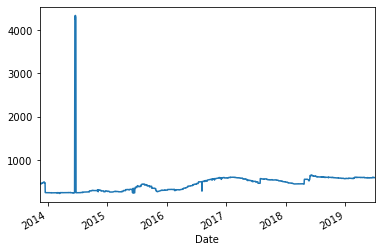

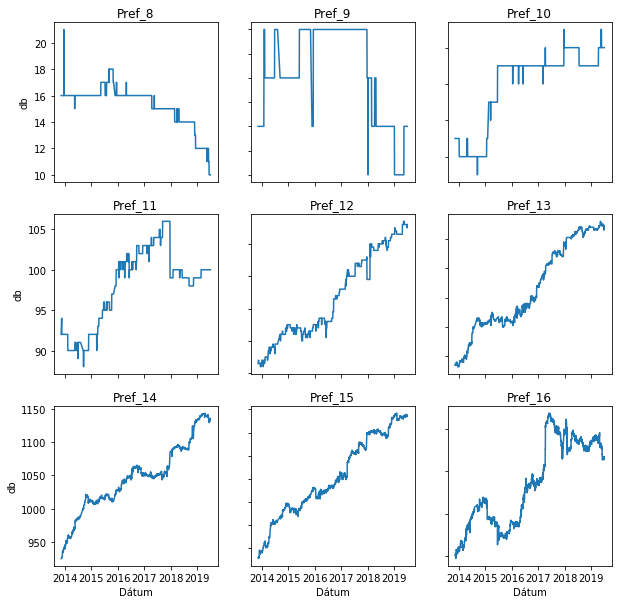

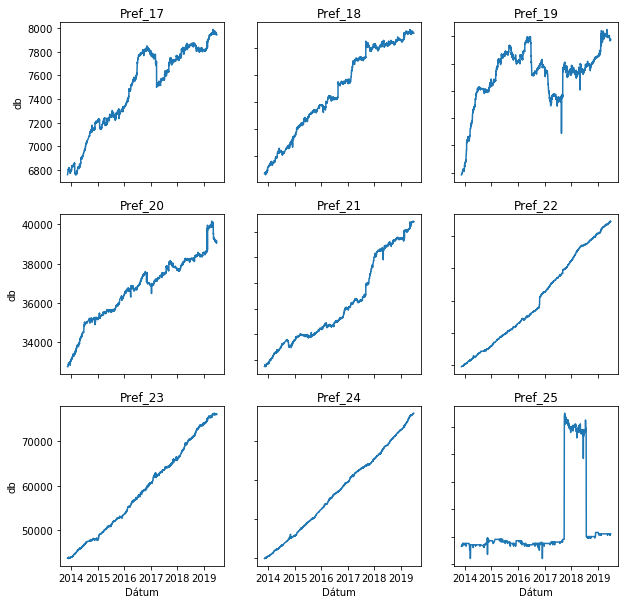

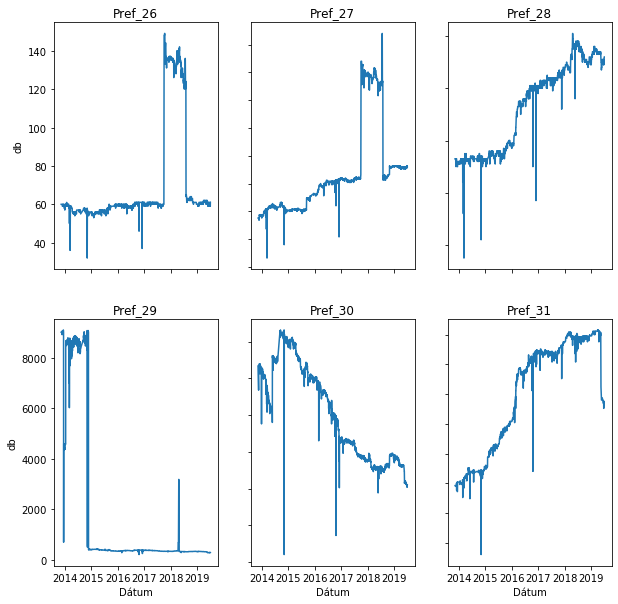

In [30]:
bme_pref['Pref_32'].plot()
c=8
fig, axs = plt.subplots(3, 3,figsize=(10,10))
for i in range(3):
    for j in range(3):
        col='Pref_'+str(c)
        axs[i,j].plot(bme_pref[col])
        axs[i,j].set_title(col)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum', ylabel='db')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig, axs = plt.subplots(3, 3,figsize=(10,10))
for i in range(3):
    for j in range(3):
        col='Pref_'+str(c)
        axs[i,j].plot(bme_pref[col])
        axs[i,j].set_title(col)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum', ylabel='db')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig, axs = plt.subplots(2, 3,figsize=(10,10))
for i in range(2):
    for j in range(3):
        col='Pref_'+str(c)
        axs[i,j].plot(bme_pref[col])
        axs[i,j].set_title(col)
        c+=1
for ax in axs.flat:
    ax.set(xlabel='Dátum', ylabel='db')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
        



Total_count
Msp_sum
Pref_1
Pref_2
Pref_3
Pref_4
Pref_5
Pref_6
Pref_7
Pref_8
Pref_9
Pref_10
Pref_11
Pref_12
Pref_13
Pref_14
Pref_15
Pref_16
Pref_17
Pref_18
Pref_19
Pref_20
Pref_21
Pref_22
Pref_23
Pref_24
Pref_25
Pref_26
Pref_27
Pref_28
Pref_29
Pref_30
Pref_31
Pref_32
Msp_1
Msp_2
Msp_3
Msp_4
Msp_5
Msp_6
Msp_7
Msp_8
Msp_9
Msp_10
Msp_11
Msp_12
Msp_13
Msp_14
Msp_15
Msp_16
Msp_17
Msp_18
Msp_19
Msp_20
Msp_21
Msp_22
Msp_23
Msp_24
Msp_25
Msp_26
Msp_27
Msp_28
Msp_29
Msp_30
Msp_31
Msp_32
Per_8
Total_count , Msp_sum , Pref_1 , Pref_2 , Pref_3 , Pref_4 , Pref_5 , Pref_6 , Pref_7 , Pref_8 , Pref_9 , Pref_10 , Pref_11 , Pref_12 , Pref_13 , Pref_14 , Pref_15 , Pref_16 , Pref_17 , Pref_18 , Pref_19 , Pref_20 , Pref_21 , Pref_22 , Pref_23 , Pref_24 , Pref_25 , Pref_26 , Pref_27 , Pref_28 , Pref_29 , Pref_30 , Pref_31 , Pref_32 , Msp_1 , Msp_2 , Msp_3 , Msp_4 , Msp_5 , Msp_6 , Msp_7 , Msp_8 , Msp_9 , Msp_10 , Msp_11 , Msp_12 , Msp_13 , Msp_14 , Msp_15 , Msp_16 , Msp_17 , Msp_18 , Msp_19 , Msp_20 , Msp_21

TypeError: show() got an unexpected keyword argument 'figsize'

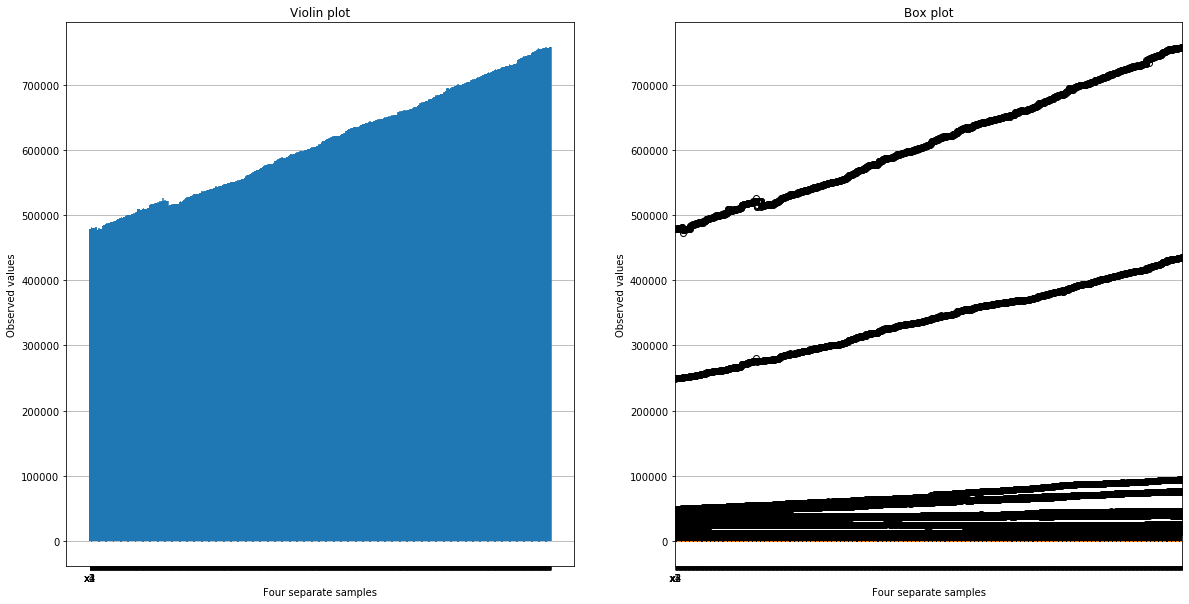

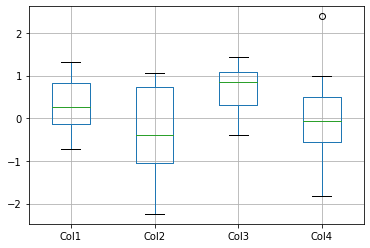